# Seaborn 数据可视化

> [Seaborn 官方网站](http://seaborn.pydata.org/)  

- Seaborn vs. Matplotlib
    - 样式漂亮
    - 代码量少
    - 适配 Pandas 数据结构（Series, DataFrame）

In [1]:
import matplotlib.pyplot as plt # 可视化
plt.style.use('classic') # 设置绘图风格
%matplotlib inline
import numpy as np # 科学计算
import pandas as pd # 数据分析

In [34]:
datapath = ".\\datasets\\"

In [2]:
# 创建一些数据
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

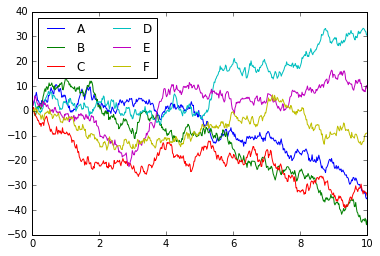

In [3]:
# 用 Matplotlib 默认样式画图
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [4]:
import seaborn as sns # 可视化
sns.set() # 设置绘图风格

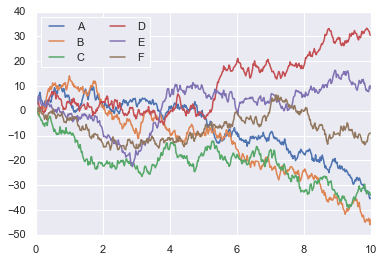

In [5]:
# Seaborn 的默认样式图形
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## 频次直方图、KDE和密度图

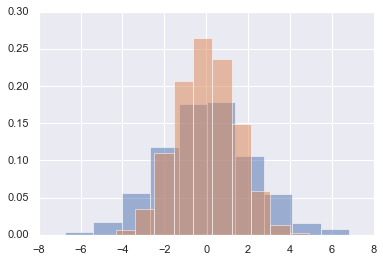

In [7]:
# 频次直方图可视化分布特性
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in "xy":
    plt.hist(data[col], density=True, alpha=0.5)

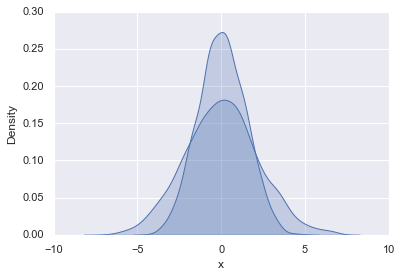

In [8]:
# KDE 可视化分布特性
for col in "xy":
    sns.kdeplot(data[col], shade=True)

c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


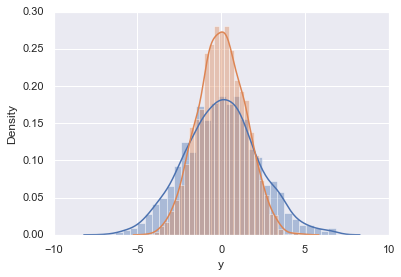

In [13]:
# 频次直方图与 KDE 的结合
sns.distplot(data["x"])
sns.distplot(data["y"]);

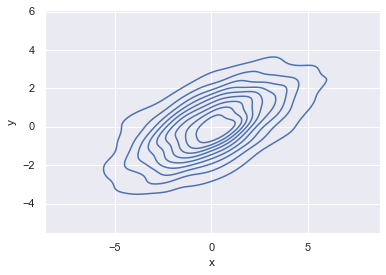

In [23]:
# 二维 KDE 图
# ValueError: If using all scalar values, you must pass an index
# 绘制二维 KDE 图需要指定索引
sns.kdeplot(x="x", y="y", data=data);

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


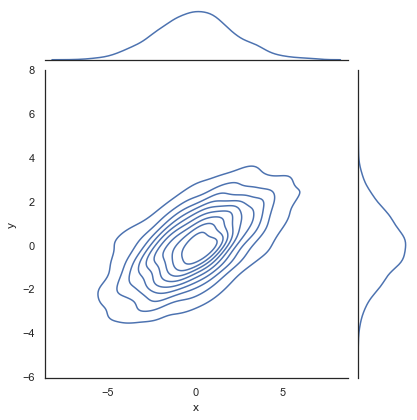

In [31]:
# 二维 KDE 的联合分布图
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


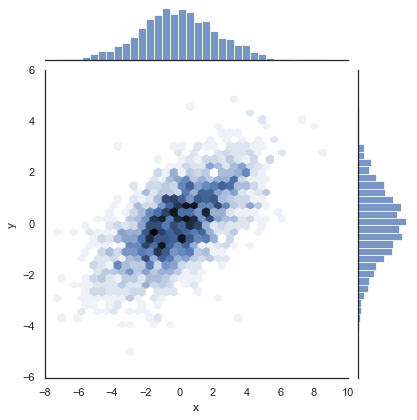

In [28]:
# 用六边形块画的联合分布图
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

## 矩阵图（pair plot）

In [29]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\programdata\miniconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


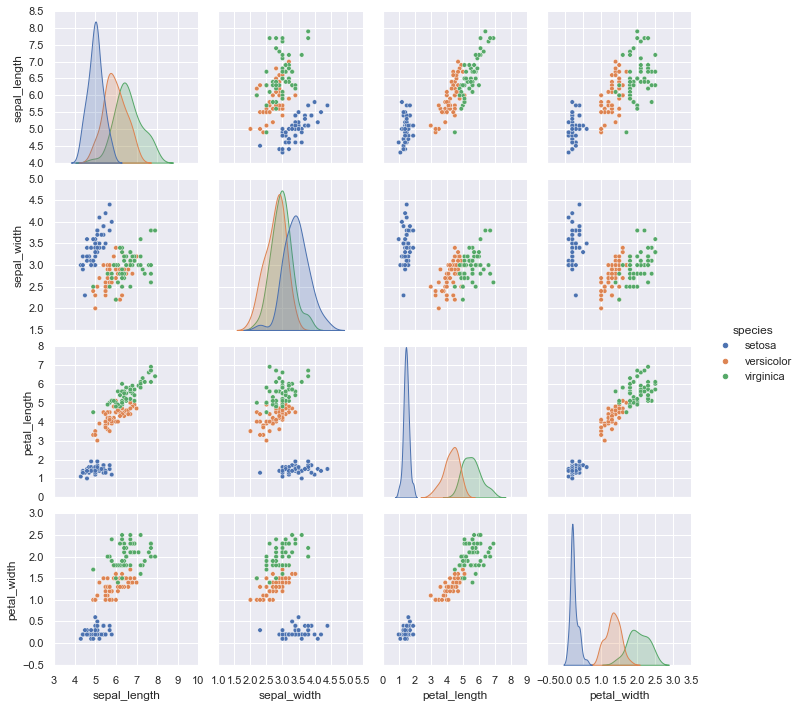

In [30]:
# 四个变量的矩阵图
sns.pairplot(iris, hue='species', size=2.5);

## 分面频次直方图

In [31]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


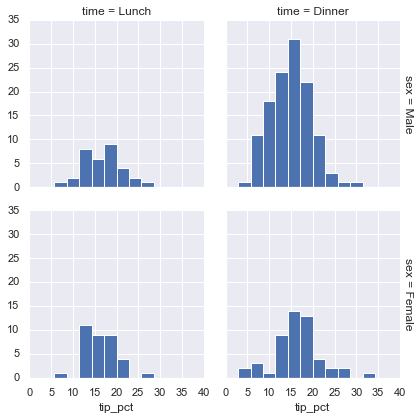

In [32]:
# 分面频次直方图
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## 因子图（factor plot）

c:\programdata\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


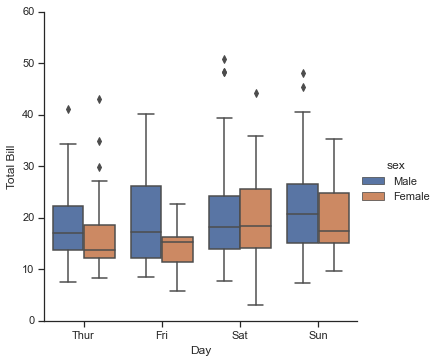

In [33]:
# 因子图中不同离散因子的分布对比
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

## 联合分布

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


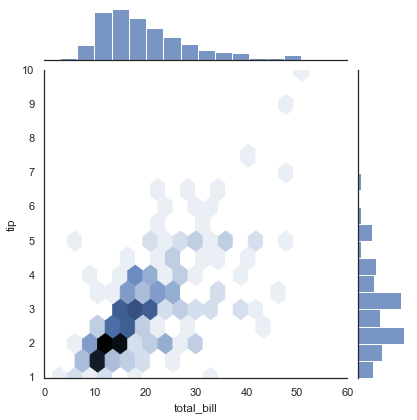

In [34]:
# 联合分布图
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


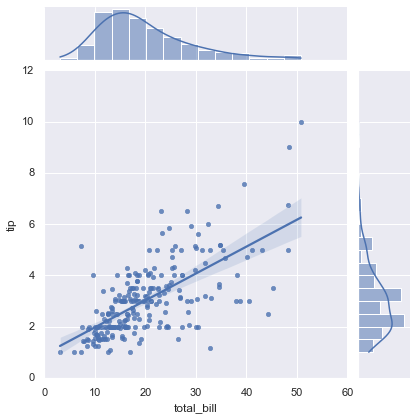

In [35]:
# 带回归拟合的联合分布
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

## 条形图

In [36]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


c:\programdata\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


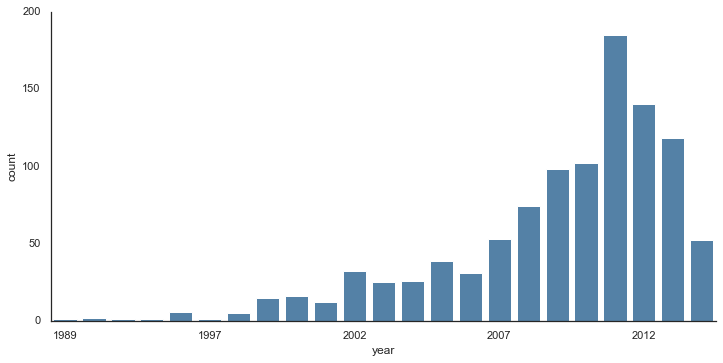

In [37]:
# 频次直方图是因子图的特殊形式
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

c:\programdata\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


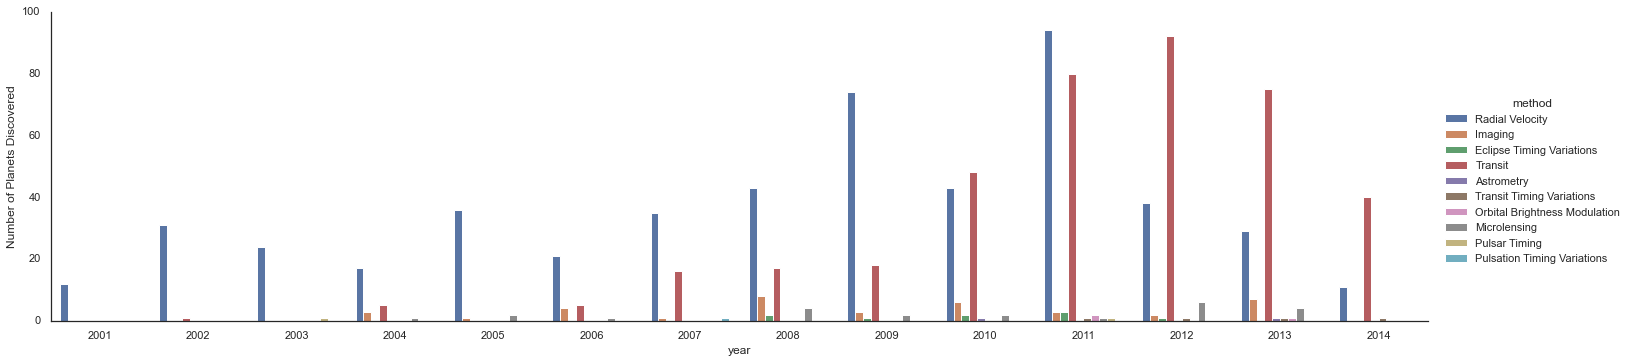

In [38]:
# 不同年份、方法发现行星的数量
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## 案例：探索马拉松比赛成绩数据

In [33]:
# 抓取数据
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/
# master/marathon-data.csv

curl: Remote file name has no length!
curl: try 'curl --help' for more information


NameError: name 'master' is not defined

In [35]:
data = pd.read_csv(datapath+'marathon-data.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '.\\datasets\\marathon-data.csv'